In [1]:
### GridsearchCV

from sklearn.datasets import load_wine
wine = load_wine()
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [2]:
from sklearn.model_selection import train_test_split

X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

                                

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

scaler = StandardScaler()

pipe_KNN = Pipeline([("scaler", scaler), ("knn", KNeighborsClassifier())])

pipe_log = make_pipeline(scaler, LogisticRegression(penalty="elasticnet", solver='saga', max_iter=10000))

pipe_forest = Pipeline([("forest", RandomForestClassifier())])

params_knn = {'knn__n_neighbors': list(range(1,50))}
params_log = {'logisticregression__l1_ratio': np.linspace(0,1,20)}
params_forest = {'forest__n_estimators': list(range(50, 200, 10))}

classifier_KNN = GridSearchCV(estimator=pipe_KNN, param_grid = params_knn, cv=5, scoring="accuracy")
classifier_log = GridSearchCV(estimator=pipe_log, param_grid = params_log, cv=5, scoring="accuracy")
classifier_forest = GridSearchCV(estimator=pipe_forest, param_grid = params_forest, cv=5,scoring="accuracy")

classifier_KNN.fit(X_train, y_train)
classifier_log.fit(X_train, y_train)
classifier_forest.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('forest', RandomForestClassifier())]),
             param_grid={'forest__n_estimators': [50, 60, 70, 80, 90, 100, 110,
                                                  120, 130, 140, 150, 160, 170,
                                                  180, 190]},
             scoring='accuracy')

In [16]:
classifier_KNN.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [18]:
classifier_log.best_estimator_.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('logisticregression',
   LogisticRegression(l1_ratio=0.3157894736842105, max_iter=10000,
                      penalty='elasticnet', solver='saga'))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'logisticregression': LogisticRegression(l1_ratio=0.3157894736842105, max_iter=10000,
                    penalty='elasticnet', solver='saga'),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__l1_ratio': 0.3157894736842105,
 'logisticregression__max_iter': 10000,
 'logisticregression__multi_class': 'auto',
 'logisticregression__n_jobs': None,
 'logisticregression__penalty': 'elasticnet',
 'logisticregression__random_state': None,
 'logisticregre

In [20]:
classifier_forest.best_estimator_.get_params()

{'memory': None,
 'steps': [('forest', RandomForestClassifier(n_estimators=80))],
 'verbose': False,
 'forest': RandomForestClassifier(n_estimators=80),
 'forest__bootstrap': True,
 'forest__ccp_alpha': 0.0,
 'forest__class_weight': None,
 'forest__criterion': 'gini',
 'forest__max_depth': None,
 'forest__max_features': 'sqrt',
 'forest__max_leaf_nodes': None,
 'forest__max_samples': None,
 'forest__min_impurity_decrease': 0.0,
 'forest__min_samples_leaf': 1,
 'forest__min_samples_split': 2,
 'forest__min_weight_fraction_leaf': 0.0,
 'forest__monotonic_cst': None,
 'forest__n_estimators': 80,
 'forest__n_jobs': None,
 'forest__oob_score': False,
 'forest__random_state': None,
 'forest__verbose': 0,
 'forest__warm_start': False}

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.85      0.92        34
           2       0.96      1.00      0.98        22

    accuracy                           0.94        89
   macro avg       0.95      0.95      0.95        89
weighted avg       0.95      0.94      0.94        89



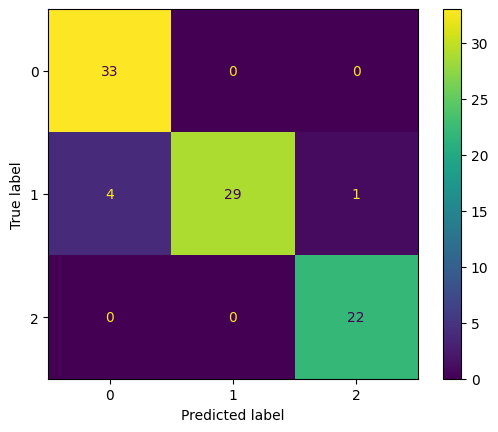

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred_knn = classifier_KNN.predict(X_test)

print(classification_report(y_test, y_pred_knn))
cm = confusion_matrix(y_test, y_pred_knn)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        22

    accuracy                           1.00        89
   macro avg       1.00      1.00      1.00        89
weighted avg       1.00      1.00      1.00        89



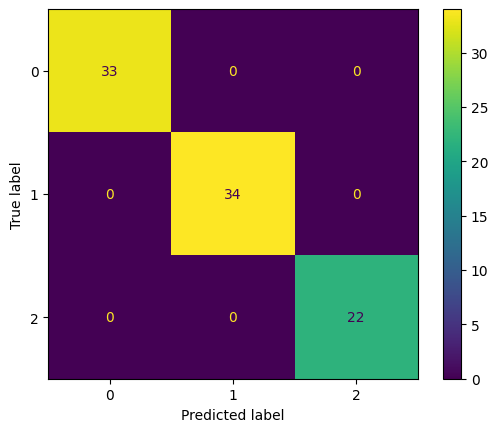

In [23]:
y_pred_log = classifier_log.predict(X_test)

print(classification_report(y_test, y_pred_log))
cm = confusion_matrix(y_test, y_pred_log)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.94      0.97      0.96        34
           2       1.00      1.00      1.00        22

    accuracy                           0.97        89
   macro avg       0.97      0.97      0.97        89
weighted avg       0.97      0.97      0.97        89



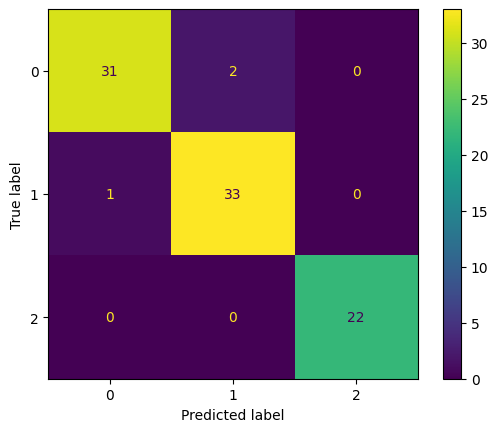

In [24]:
y_pred_forest = classifier_forest.predict(X_test)

print(classification_report(y_test, y_pred_forest))
cm = confusion_matrix(y_test, y_pred_forest)
ConfusionMatrixDisplay(cm).plot()

In [30]:
import joblib

joblib.dump(classifier_log, 'production_model.joblib')

my_model = joblib.load('production_model.joblib')

my_model.predict(X_test)


array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2,
       1])